# Importing Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glass.xlsx to glass.xlsx


In [ ]:
data = pd.read_excel(list(uploaded.keys())[0],sheet_name = 'glass' )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


# Preprocessing

In [ ]:
data[data.duplicated(keep = False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
df = data.copy()

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

# EDA

## Distribution Plots

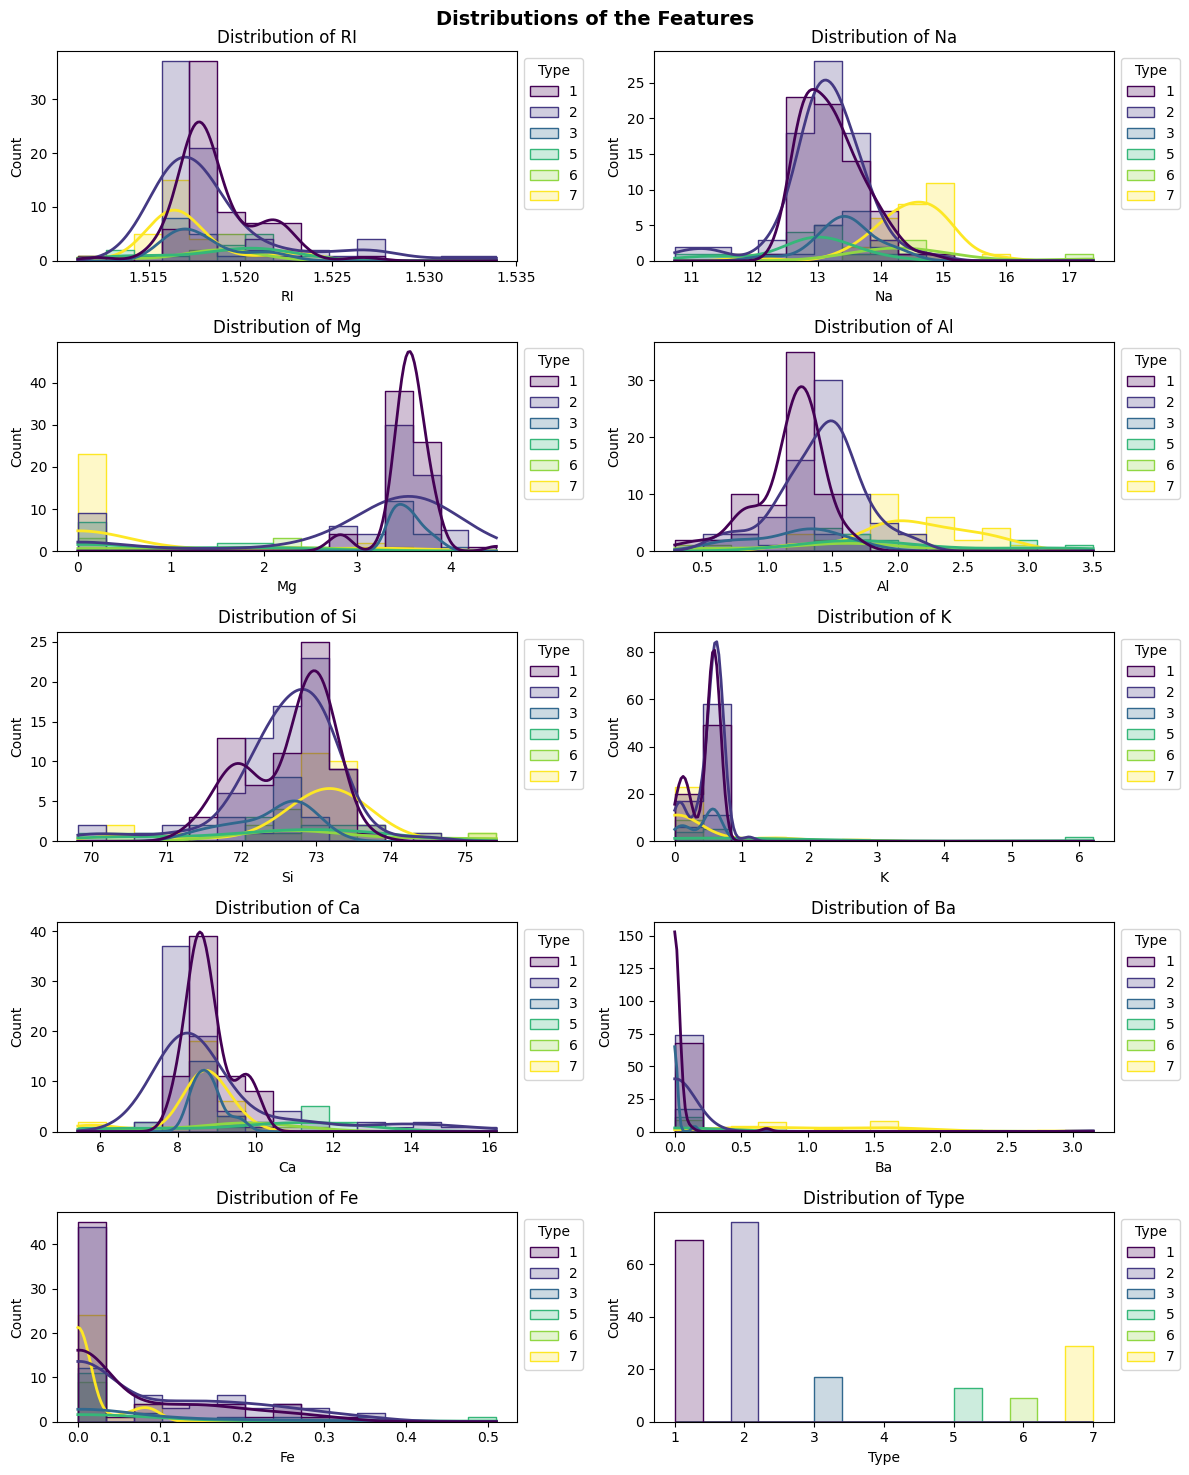

In [ ]:
p = 1
n_rows = np.ceil(len(df.columns)/2).astype(int)
n_cols = 2
sns.set_style = 'darkgrid'
plt.figure(figsize = (12,15))
plt.suptitle('Distributions of the Features', fontsize = 14, fontweight = 'bold')
for col in df.columns:
  plt.subplot(n_rows, n_cols, p)
  sns.histplot(data = df, x = col, kde = True, element = 'step', palette = 'viridis',
               fill = True, shrink = 1, hue = 'Type', multiple = 'layer', stat = 'count',
               line_kws= {'linewidth': 2}, bins = 15)
  sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))
  plt.title(f'Distribution of {col}')
  p += 1
plt.tight_layout()
plt.show()

Feature-wise Inferences:

**RI (Refractive Index)**

Most glass types cluster around a narrow RI range.
Some overlap exists, but certain types show distinct peaks, suggesting RI can help differentiate types.

**Na (Sodium)**

Wide spread across types, but some glass types have noticeably higher sodium content.
Useful for classification, though not sharply separated.

**Mg (Magnesium)**

Strong separation: some types have zero magnesium, while others show clear peaks.
Excellent feature for distinguishing certain glass types.

**Al (Aluminum)**

Moderate variation across types.
Some glass types show tighter distributions, indicating potential for classification.

**Si (Silicon)**

Very narrow range across all types.
Not a strong differentiator—most types have similar silicon content.

**K (Potassium)**

Highly skewed with many values near zero.
A few types show spikes at higher potassium levels, suggesting selective usefulness.

**Ca (Calcium)**

Broad distribution with overlapping peaks.
May help in combination with other features but not strongly discriminative alone.

**Ba (Barium)**

Most types have zero barium; only a few show presence.
Strong indicator for specific glass types.

**Fe (Iron)**

Mostly near zero, with rare spikes.
Like barium, could be a key feature for identifying rare glass types.

**Type (Glass Type)**

Shows the count of each glass type in the dataset.
Imbalanced distribution—some types are much more frequent than others, which may affect model training.

## Box Plots

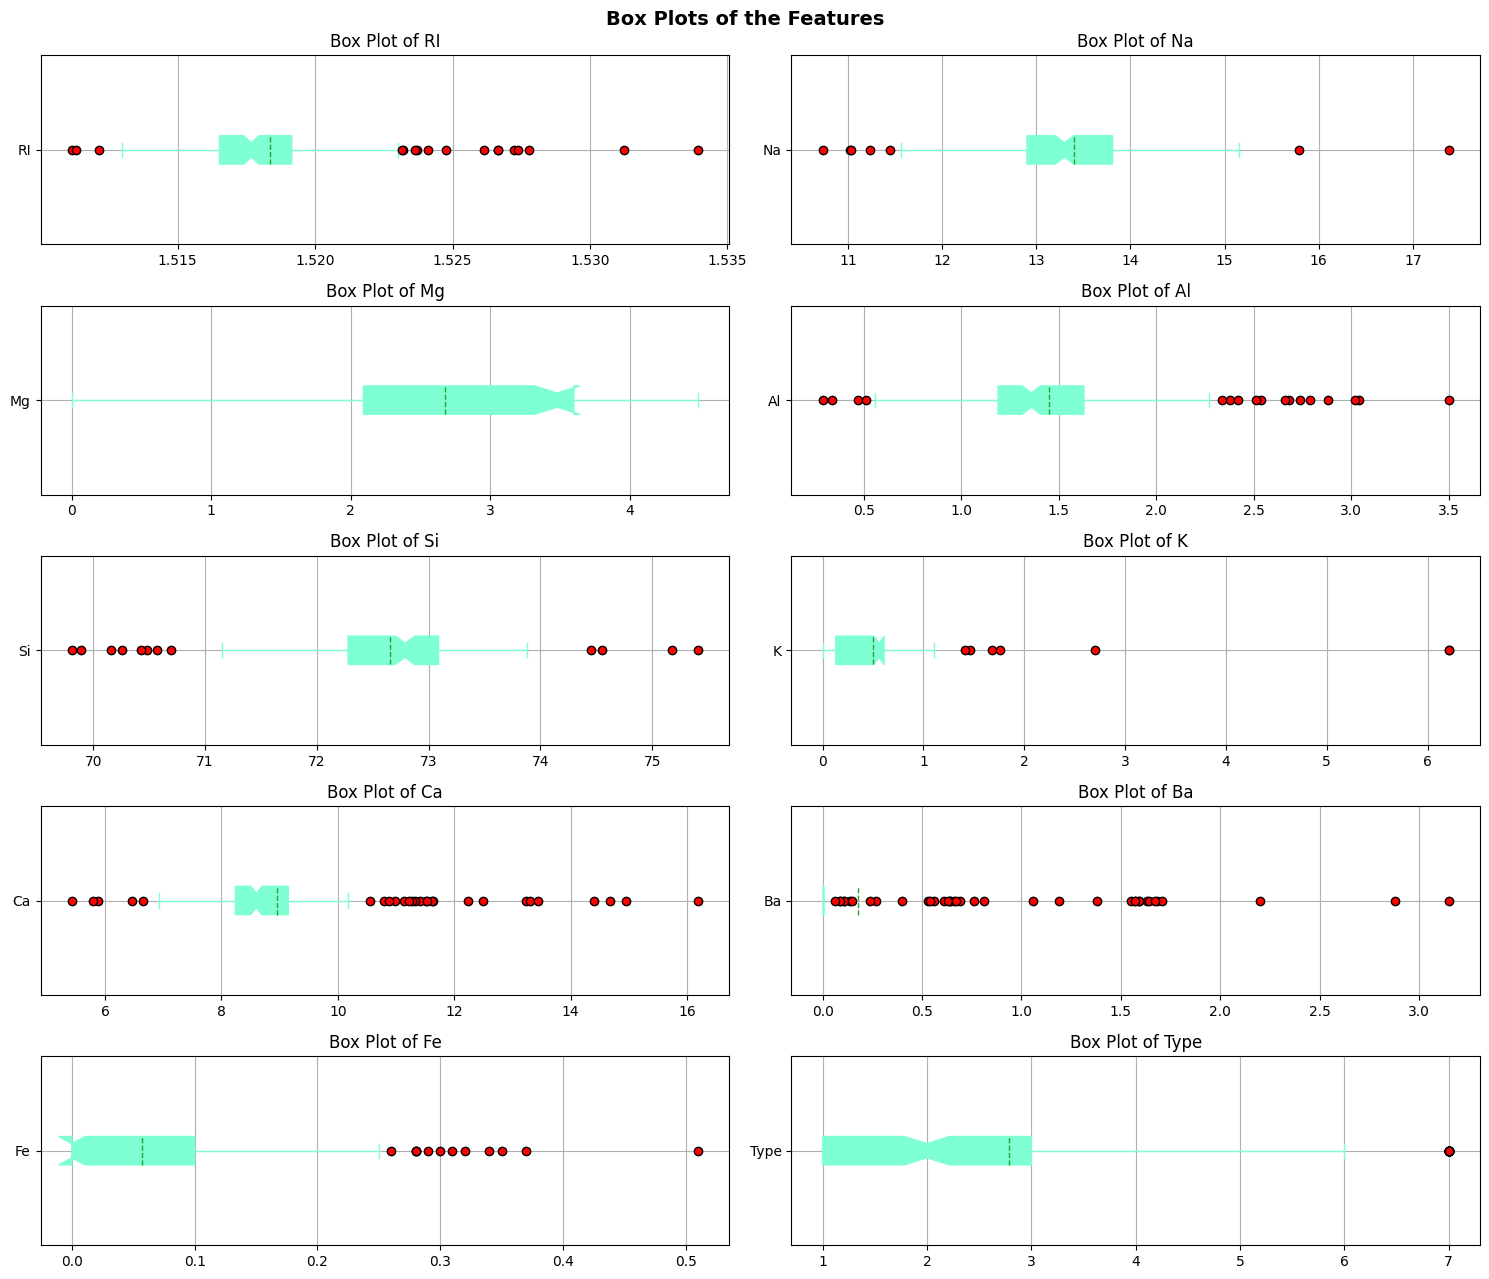

In [ ]:
p =1
n_rows = np.ceil(len(df.columns)/2).astype(int)
n_cols = 2
plt.figure(figsize = (15,13))
plt.suptitle('Box Plots of the Features', fontsize = 14, fontweight = 'bold')
for col in df.columns:
  plt.subplot(n_rows, n_cols, p)
  df[col].plot(kind = 'box', notch = True, showmeans = True, meanline = True, vert = False,
          grid = True, patch_artist = True, color = 'aquamarine',
          flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 6))
  plt.title(f'Box Plot of {col}')
  p+=1
plt.tight_layout()
plt.show()

**RI (Refractive Index)**
The mean and median are nearly identical, located around 1.52. This suggests a symmetrical distribution with few extreme values, although some outliers are present.

**Na (Sodium)**
The mean and median are both tightly clustered around 13, indicating a very consistent sodium content across most samples. The presence of outliers suggests a few samples have unusually high sodium levels.

**Mg (Magnesium)**
The mean is slightly lower than the median, suggesting a left skew in the data. The broad notch and long whiskers indicate a wide range of magnesium values, with no outliers.

**Al (Aluminum)**
The mean is higher than the median due to numerous high-value outliers. This suggests that while most samples have low aluminum content, there are several samples with significantly higher amounts.

**Si (Silicon)**
The mean and median are closely aligned, around 73, indicating a symmetrical distribution. However, a large number of outliers on both ends show that some samples have unusually high or low silicon content.

**K (Potassium)**
The mean is notably slightly lower than the median, which is near zero. This is due to a few significant outliers, meaning most samples have very little potassium while a small number have a high amount.

**Ca (Calcium)**
The mean is higher than the median, indicating a strong positive skew in the data, likely caused by the many high-value outliers. This suggests that while some samples have low calcium, others have a very high concentration.

**Ba (Barium)**
The mean and median are at zero. A large number of samples contain no barium, while the scattered outliers show that some samples have a significant amount of the element.

**Fe (Iron)**
Both the mean and median are very close, near 0.1, indicating that most samples have very low iron content. The few high-value outliers suggest that some samples are iron-rich.

**Type**
The plot for "Type" shows that the median is 2, but the mean is slightly higher. This indicates that while "Type 2" is the most common category, the presence of other types (likely Type 3 and higher) pulls the mean up.

## Correlation Matrix

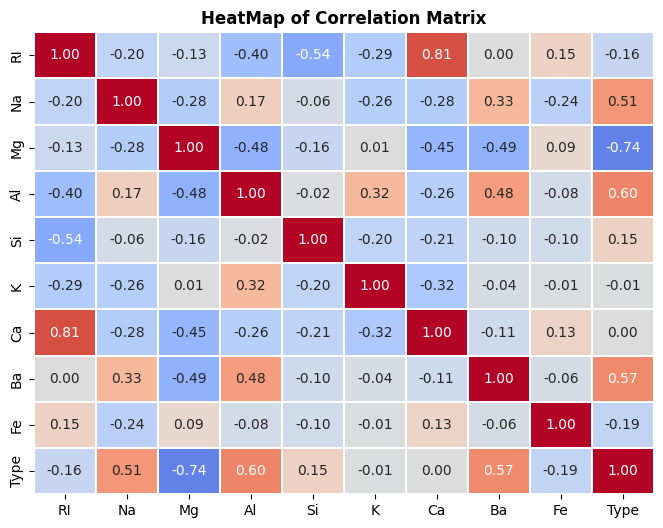

In [ ]:
plt.figure(figsize =(8,6))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', linewidths = 0.05, cmap ='coolwarm',
            cbar = False, vmin = -1, vmax = 1)
plt. title('HeatMap of Correlation Matrix', fontweight = 'bold')
plt.show()

## Pair Plots

<Figure size 1500x1300 with 0 Axes>

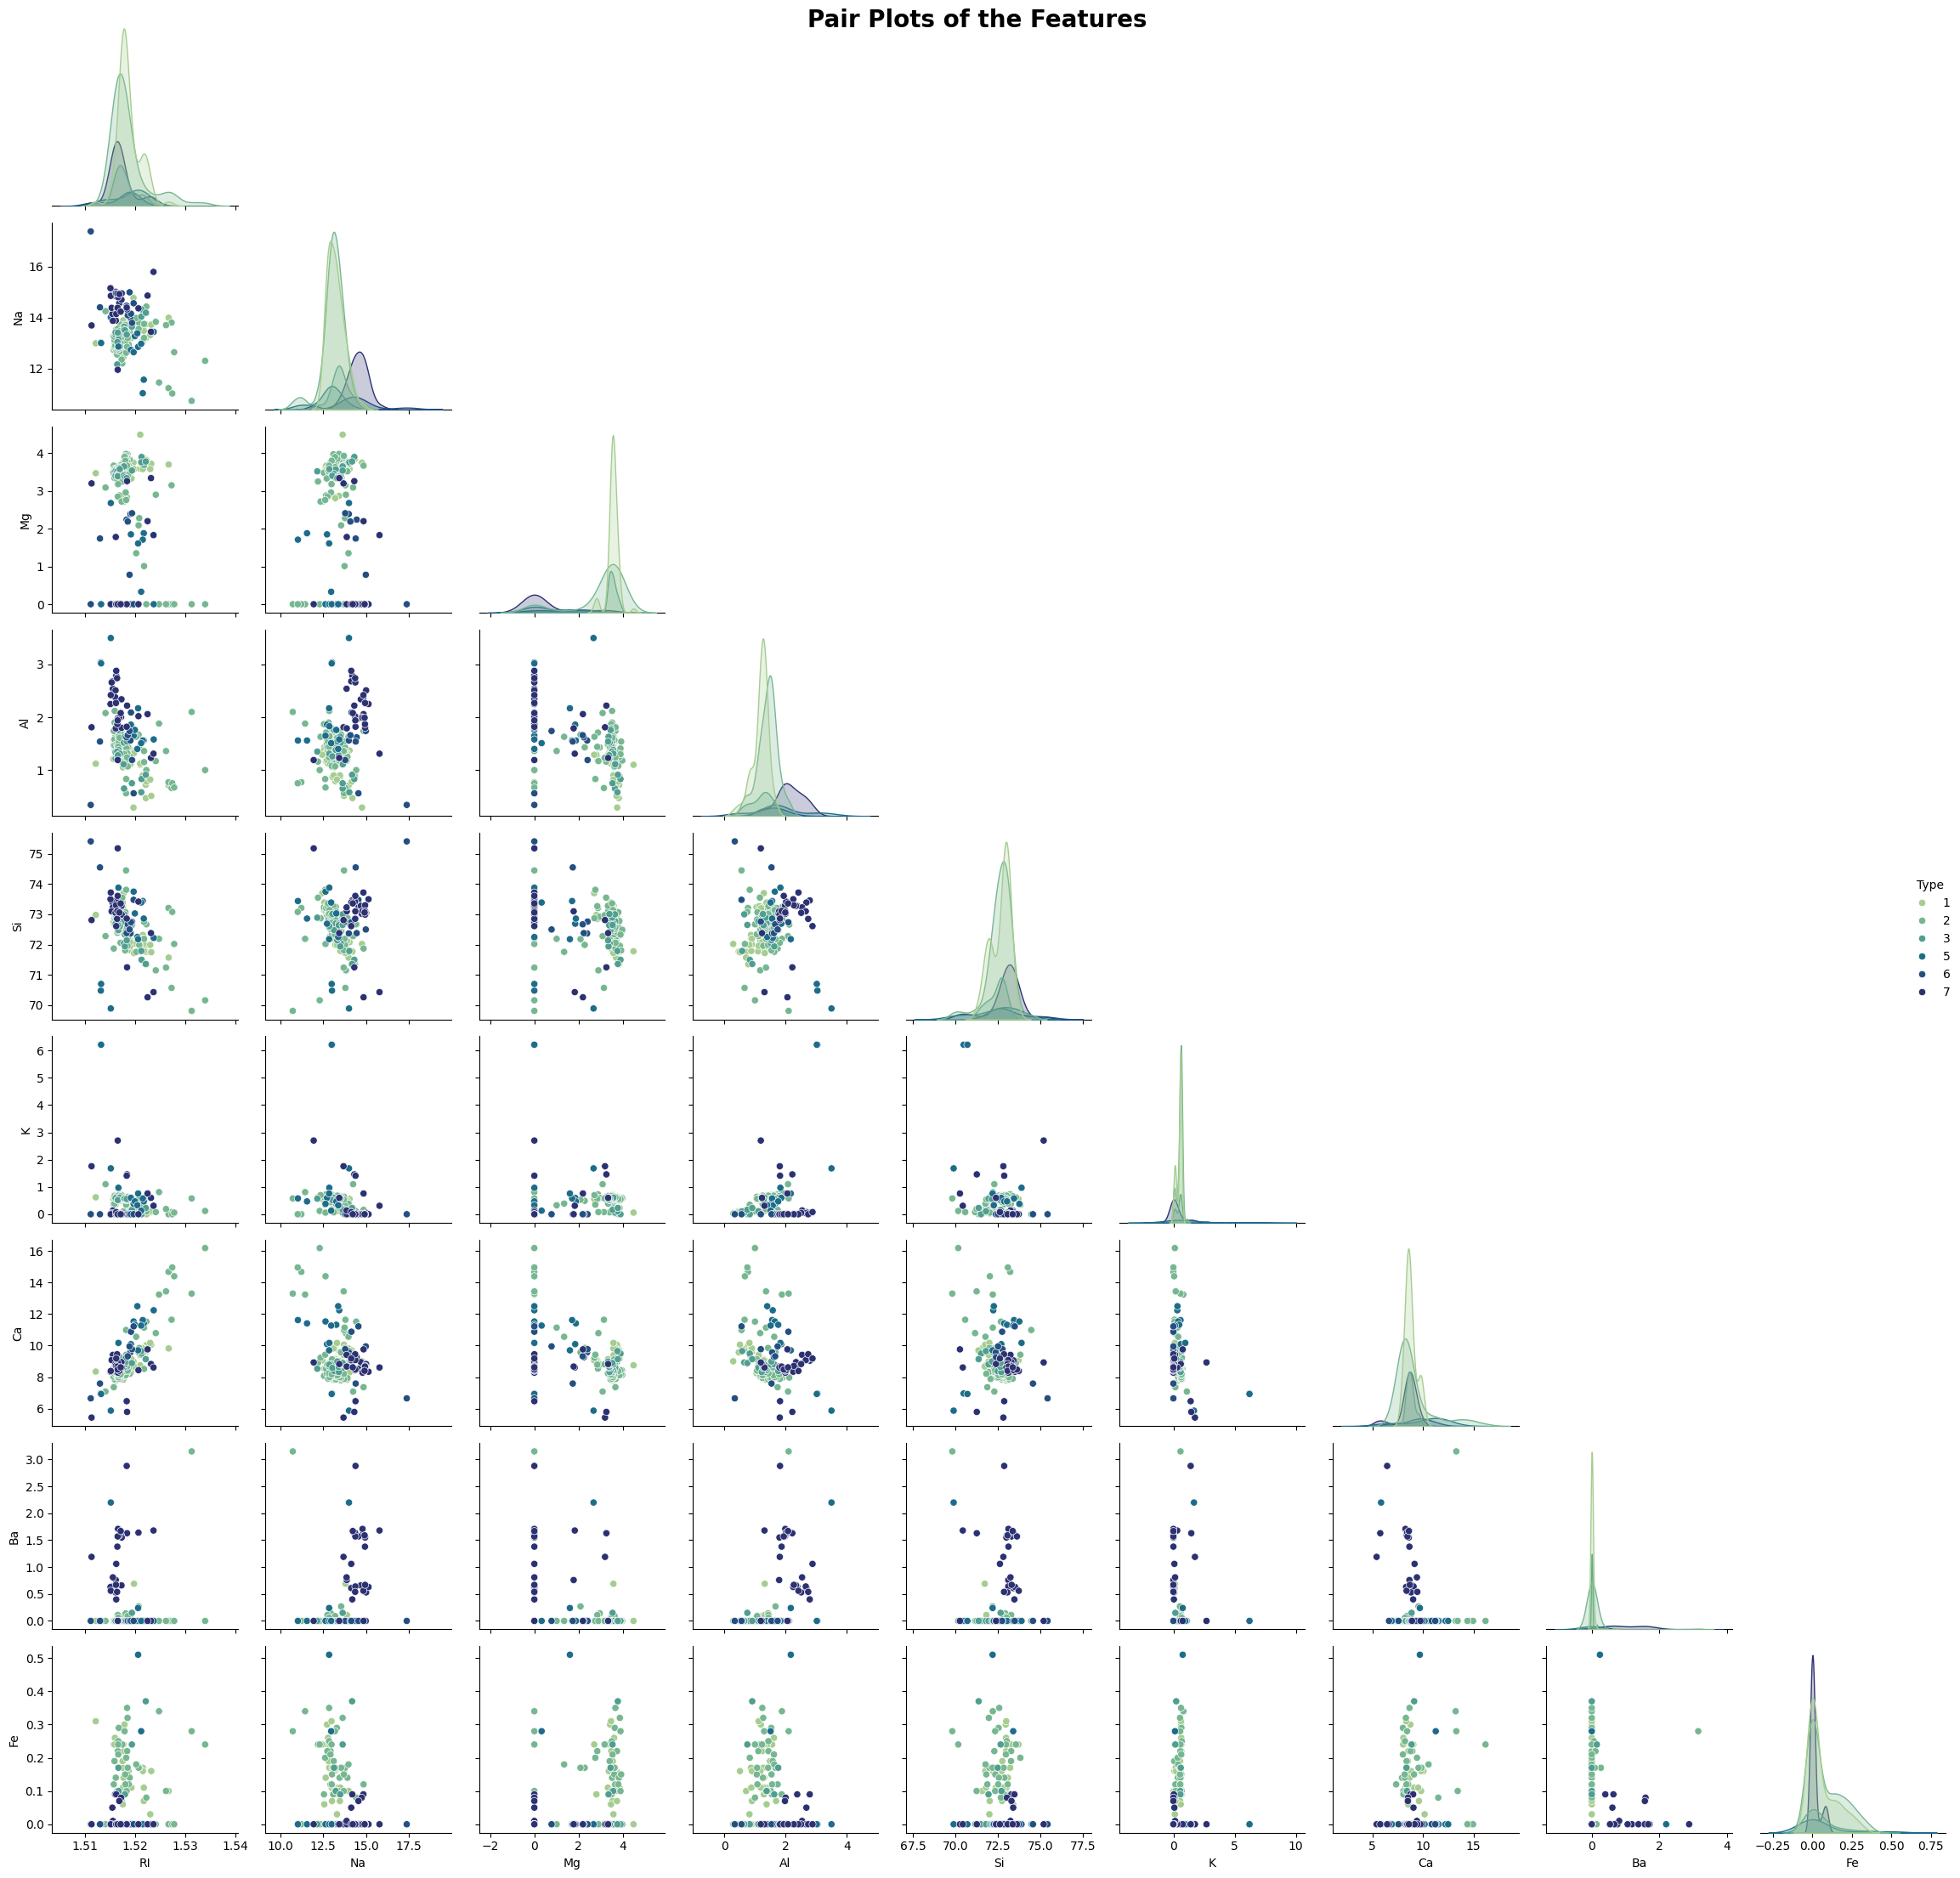

In [ ]:
plt.figure(figsize = (15,13))
sns.pairplot(data = df, hue = 'Type', palette = 'crest', corner = True,
             )
plt.suptitle('Pair Plots of the Features', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

From the correlation matrix it is evident that Magnesium is contributing more in predicting the Type. Although it has a moderate negative correlation but it is the highest predictor among other metals followed by aluminium with 0.60, Barium with 0.57 and sodium with 0.51. All other metals were not contributing in predicting the Type with Refractive Index, Potassium and Calcium having no relation.

There are other metals which are involved in the multicollinearity. RI and Ca are the most strongly positively correlated variables with 0.81 and Mg and Ba with negative 0.49. Al has a moderate positive correlation with Ba, and a moderate negative correlation with RI and Mg. Na shows a weak negative correlation with most variables. Si and K have no significant correlation with other variables.

# Model Building

## RandomForest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df1 = df.copy()

In [ ]:
X = df1.drop('Type', axis = 1)
y = df1['Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 9), (43, 9), (170,), (43,))

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 25, random_state = 42, class_weight= 'balanced')
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=25,
                       random_state=42)

### Model on Traing Data

In [ ]:
yhat_train = rf_model.predict(X_train)
yhat_train_prob = rf_model.predict_proba(X_train)

#### Confusion Matrix

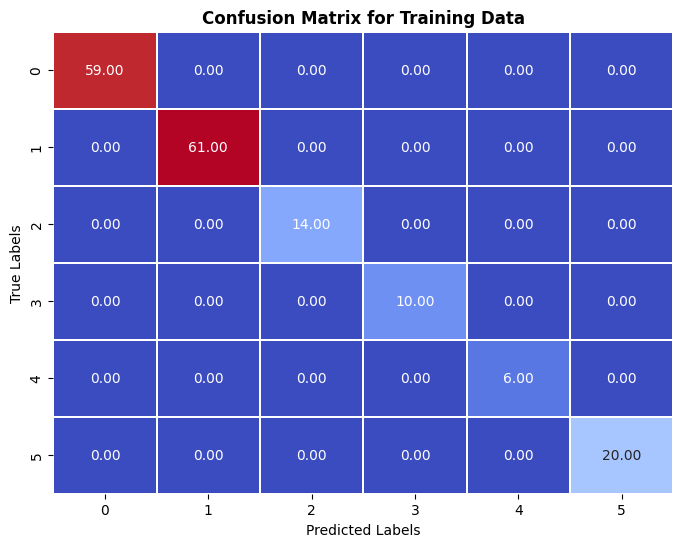

In [ ]:
cm_rf_train = confusion_matrix(y_train, yhat_train)
plt.figure(figsize = (8,6))
sns.heatmap(cm_rf_train, annot= True, cbar = False ,cmap = 'coolwarm', fmt = '.2f',
            linewidths = 0.25)
plt.title('Confusion Matrix for Training Data', fontweight = 'bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification Report

In [ ]:
ac_rf_train = accuracy_score(y_train, yhat_train)
print('Accuracy Score')
print(ac_rf_train)

Accuracy Score
1.0


In [ ]:
print('Classification Report')
print(classification_report(y_train, yhat_train))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        20

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [ ]:
ras_rf_train = roc_auc_score(y_train, yhat_train_prob, multi_class = 'ovr')
ras_rf_train

np.float64(1.0)

From the above metrics it was clear that the random Forest Model has predicted the values accurately. The accuracy, precise, recall shown 1.0. Reducing the n_estimators too provided with the same result.The model gave the same results with n_estimators (25,50,100).

### Model on Testing Data

In [ ]:
yhat_test = rf_model.predict(X_test)
yhat_test_prob = rf_model.predict_proba(X_test)

#### Confusion Matrix

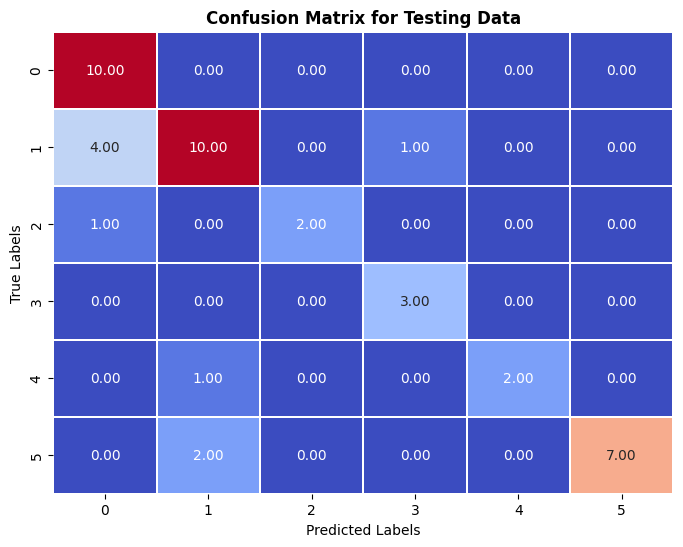

In [ ]:
cm_rf_test = confusion_matrix(y_test, yhat_test)
plt.figure(figsize = (8,6))
sns.heatmap(cm_rf_test, annot= True, cbar = False ,cmap = 'coolwarm', fmt = '.2f',
            linewidths = 0.25)
plt.title('Confusion Matrix for Testing Data', fontweight = 'bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification Report

In [ ]:
ac_rf_test = accuracy_score(y_test, yhat_test)
print('Accuracy Score')
print(ac_rf_test)

Accuracy Score
0.7906976744186046


In [ ]:
print('Classification Report')
print(classification_report(y_test, yhat_test))

Classification Report
              precision    recall  f1-score   support

           1       0.67      1.00      0.80        10
           2       0.77      0.67      0.71        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.79        43
   macro avg       0.86      0.80      0.81        43
weighted avg       0.82      0.79      0.79        43



In [ ]:
ras_rf_test = roc_auc_score(y_test, yhat_test_prob, multi_class = 'ovr')
ras_rf_test

np.float64(0.9649637127578304)

## Bagging Classifier

In [ ]:
param_grid = {
    'max_depth' : [2,4,6,8,10,12,14,16,18,20],
    'min_samples_split' : [2,4,6,8,10,12],
    'min_samples_leaf' : [2,4,6,8,10],
    'max_leaf_nodes' : [10,15,20,25,30],
    'class_weight' : [None,'balanced'],
    'criterion' : ['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 42),
                           param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'max_leaf_nodes': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10, 12]})

In [ ]:
best_dt = grid_search.best_estimator_
best_dt, grid_search.best_params_

(DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20, min_samples_leaf=2,
                        random_state=42),
 {'class_weight': None,
  'criterion': 'gini',
  'max_depth': 8,
  'max_leaf_nodes': 20,
  'min_samples_leaf': 2,
  'min_samples_split': 2})

In [ ]:
bagging_model = BaggingClassifier(estimator = best_dt, n_estimators = 100,
                                  random_state = 42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=8,
                                                   max_leaf_nodes=20,
                                                   min_samples_leaf=2,
                                                   random_state=42),
                  n_estimators=100, random_state=42)

### Model on Training Data

In [ ]:
yhat_bg_train = bagging_model.predict(X_train)
yhat_bg_prob_train = bagging_model.predict_proba(X_train)

#### Confusion Matrix

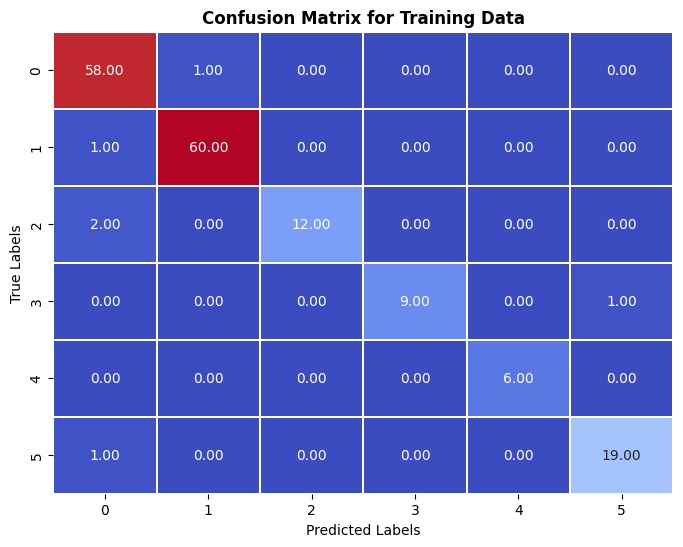

In [ ]:
cm_bg_train = confusion_matrix(y_train, yhat_bg_train)
plt.figure(figsize = (8,6))
sns.heatmap(cm_bg_train, annot = True, cbar = False, cmap = 'coolwarm', fmt = '.2f',
            linewidths = 0.25)
plt.title('Confusion Matrix for Training Data', fontweight = 'bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification Report

In [ ]:
ac_bg_train = accuracy_score(y_train, yhat_bg_train)
print('Accuracy Score')
print(ac_bg_train)

Accuracy Score
0.9647058823529412


In [ ]:
print("Classification Report")
print(classification_report(y_train, yhat_bg_train))
print("*"*20)
print('\nROC_AUC Score\n')
print(roc_auc_score(y_train, yhat_bg_prob_train, multi_class = 'ovr'))

Classification Report
              precision    recall  f1-score   support

           1       0.94      0.98      0.96        59
           2       0.98      0.98      0.98        61
           3       1.00      0.86      0.92        14
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         6
           7       0.95      0.95      0.95        20

    accuracy                           0.96       170
   macro avg       0.98      0.95      0.96       170
weighted avg       0.97      0.96      0.96       170

********************

ROC_AUC Score

0.999230272276809


In [ ]:
ras_bg_train = roc_auc_score(y_train, yhat_bg_prob_train, multi_class = 'ovr')
ras_bg_train

np.float64(0.999230272276809)

### Model on Testing Data

In [ ]:
yhat_bg_test = bagging_model.predict(X_test)
yhat_bg_prob_test = bagging_model.predict_proba(X_test)

#### Confusion Matrix

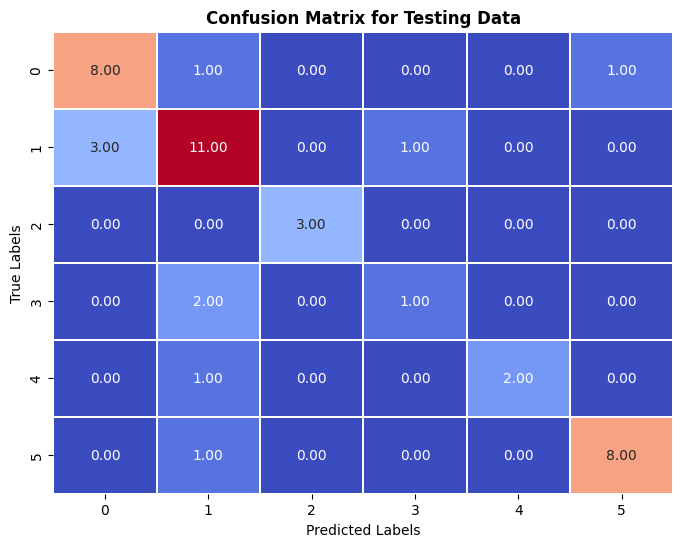

In [ ]:
cm_bg_test = confusion_matrix(y_test, yhat_bg_test)
plt.figure(figsize = (8,6))
sns.heatmap(cm_bg_test, annot = True, cmap = 'coolwarm',
            cbar = False, fmt = ".2f", linewidths = 0.25)
plt.title('Confusion Matrix for Testing Data', fontweight = 'bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification Report

In [ ]:
ac_bg_test = accuracy_score(y_test, yhat_bg_test)
print('Accuracy Score')
print(ac_bg_test)

Accuracy Score
0.7674418604651163


In [ ]:
print("Classification Report")
print(classification_report(y_test, yhat_bg_test))
print("*"*20)
print('\nROC_AUC Score\n')
print(roc_auc_score(y_test, yhat_bg_prob_test, multi_class = 'ovr'))

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.80      0.76        10
           2       0.69      0.73      0.71        15
           3       1.00      1.00      1.00         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.77        43
   macro avg       0.80      0.74      0.76        43
weighted avg       0.77      0.77      0.76        43

********************

ROC_AUC Score

0.9741854822737176


In [ ]:
ras_bg_test = roc_auc_score(y_test, yhat_bg_prob_test, multi_class = 'ovr')
ras_bg_test

np.float64(0.9741854822737176)

## Adaboost Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(max_iter = 400)

In [ ]:
boosting_model = AdaBoostClassifier(
    estimator = best_dt,
    n_estimators = 100, random_state = 42)
boosting_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8,
                                                    max_leaf_nodes=20,
                                                    min_samples_leaf=2,
                                                    random_state=42),
                   n_estimators=100, random_state=42)

### Model on Training Data

In [ ]:
yhat_bo_train = boosting_model.predict(X_train)
yhat_bo_prob_train = boosting_model.predict_proba(X_train)


#### Confusion Matrix

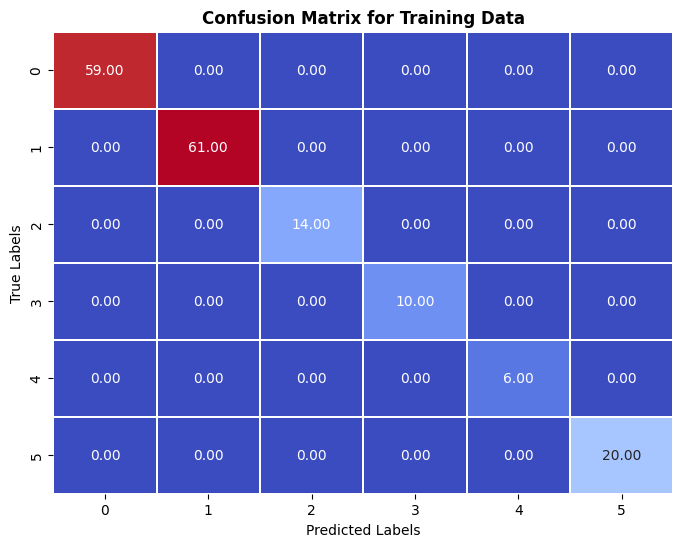

In [ ]:
cm_bo_train = confusion_matrix(y_train, yhat_bo_train)
plt.figure(figsize = (8,6))
sns.heatmap(cm_bo_train, annot = True, cmap= 'coolwarm',
            cbar = False, fmt = ".2f", linewidths = 0.025)
plt.title('Confusion Matrix for Training Data', fontweight = 'bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification Report

In [ ]:
ac_bo_train = accuracy_score(y_train, yhat_bo_train)
print('Accuracy Score')
print(ac_bo_train)

Accuracy Score
1.0


In [ ]:
print("Classification Report")
print(classification_report(y_train, yhat_bo_train))
print("*"*2)
print('\nROC_AUC Score\n')
print(roc_auc_score(y_train, yhat_bo_prob_train, multi_class = 'ovr'))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        20

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

**

ROC_AUC Score

1.0


In [ ]:
ras_bo_train = roc_auc_score(y_train, yhat_bo_prob_train, multi_class = 'ovr')
ras_bo_train

np.float64(1.0)

### Model on Testing Data

In [ ]:
yhat_bo_test = boosting_model.predict(X_test)
yhat_bo_prob_test = boosting_model.predict_proba(X_test)

#### Confusion Matrix

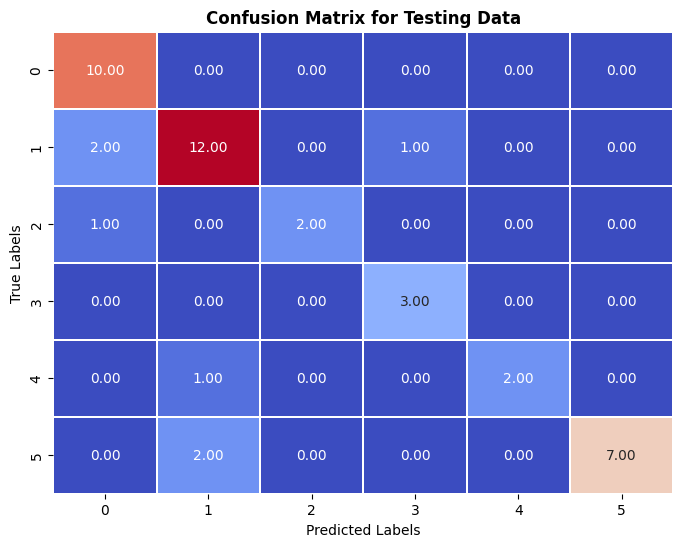

In [ ]:
cm_bo_test = confusion_matrix(y_test, yhat_bo_test)
plt.figure(figsize = (8,6))
sns.heatmap(cm_bo_test, annot = True, cmap= 'coolwarm',
            cbar = False, fmt = ".2f", linewidths = 0.025)
plt.title('Confusion Matrix for Testing Data', fontweight = 'bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification Report

In [ ]:
ac_bo_test = accuracy_score(y_test, yhat_bo_test)
print('Accuracy Score')
print(ac_bo_test)

Accuracy Score
0.8372093023255814


In [ ]:
print("Classification Report")
print(classification_report(y_test, yhat_bo_test))
print("*"*2)
print('\nROC_AUC Score\n')
print(roc_auc_score(y_test, yhat_bo_prob_test, multi_class = 'ovr'))

Classification Report
              precision    recall  f1-score   support

           1       0.77      1.00      0.87        10
           2       0.80      0.80      0.80        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.84        43
   macro avg       0.89      0.82      0.83        43
weighted avg       0.86      0.84      0.84        43

**

ROC_AUC Score

0.9785650623885918


In [ ]:
ras_bo_test = roc_auc_score(y_test, yhat_bo_prob_test, multi_class = 'ovr')
ras_bo_test

np.float64(0.9785650623885918)

## Stacking Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, VotingClassifier

In [ ]:
estimators= [
    ('lr', LogisticRegression(max_iter=400, random_state= 42)),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(random_state = 42)),
    ('dt', best_dt)
]

### Voting Classifier

In [ ]:
voting_classifier = VotingClassifier(estimators)
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=400,
                                                 random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('svc', SVC(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=8,
                                                     max_leaf_nodes=20,
                                                     min_samples_leaf=2,
                                                     random_state=42))])

### Model on Training Data

In [ ]:
yhat_vc_train = voting_classifier.predict(X_train)

#### Confusion Matrix

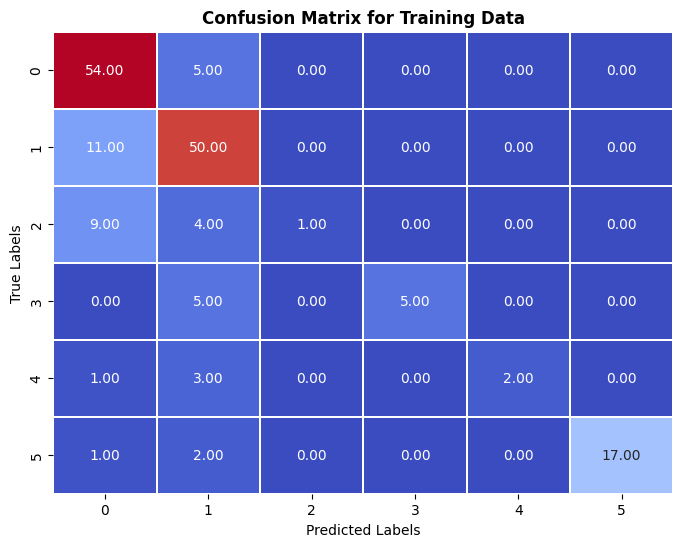

In [ ]:
cm_vc_train = confusion_matrix(y_train, yhat_vc_train)
plt.figure(figsize = (8,6))
sns.heatmap(cm_vc_train, annot = True, cmap = 'coolwarm',
            cbar = False, fmt = '.2f', linewidths = 0.25)
plt.title('Confusion Matrix for Training Data', fontweight = 'bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification Report

In [ ]:
ac_vc_train = accuracy_score(y_train, yhat_vc_train)
print('Accuracy Score')
print(ac_vc_train)

Accuracy Score
0.7588235294117647


In [ ]:
print("Classification Report")
print(classification_report(y_train, yhat_vc_train))

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.92      0.80        59
           2       0.72      0.82      0.77        61
           3       1.00      0.07      0.13        14
           5       1.00      0.50      0.67        10
           6       1.00      0.33      0.50         6
           7       1.00      0.85      0.92        20

    accuracy                           0.76       170
   macro avg       0.91      0.58      0.63       170
weighted avg       0.80      0.76      0.73       170



### Model on Testing Data

In [ ]:
yhat_vc_test = voting_classifier.predict(X_test)

#### Confusion Matrix

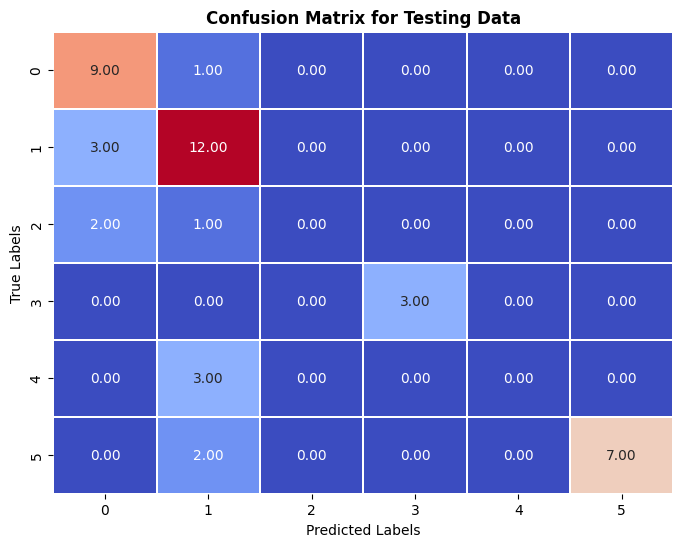

In [ ]:
cm_vc_test = confusion_matrix(y_test, yhat_vc_test)
plt.figure(figsize = (8,6))
sns.heatmap(cm_vc_test, annot = True, cmap = 'coolwarm',
            cbar = False, fmt = '.2f', linewidths = 0.025)
plt.title('Confusion Matrix for Testing Data', fontweight = 'bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification Report

In [ ]:
ac_vc_test = accuracy_score(y_test, yhat_vc_test)
print('Accuracy Score')
print(ac_vc_test)

Accuracy Score
0.7209302325581395


In [ ]:
print("Classification Report")
print(classification_report(y_test, yhat_vc_test))

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.90      0.75        10
           2       0.63      0.80      0.71        15
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         3
           7       1.00      0.78      0.88         9

    accuracy                           0.72        43
   macro avg       0.55      0.58      0.56        43
weighted avg       0.65      0.72      0.67        43



### Stacking Classifier

In [ ]:
meta_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [ ]:
stacking_model = StackingClassifier(estimators = estimators,
                                    final_estimator = meta_model,
                                    cv = 5, passthrough = False)
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(max_iter=400,
                                                   random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('svc', SVC(random_state=42)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=8,
                                                       max_leaf_nodes=20,
                                                       min_samples_leaf=2,
                                                       random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

### Model on Training Data

In [ ]:
yhat_sm_train = stacking_model.predict(X_train)
yhat_sm_prob_train = stacking_model.predict_proba(X_train)

#### Confusion Matrix

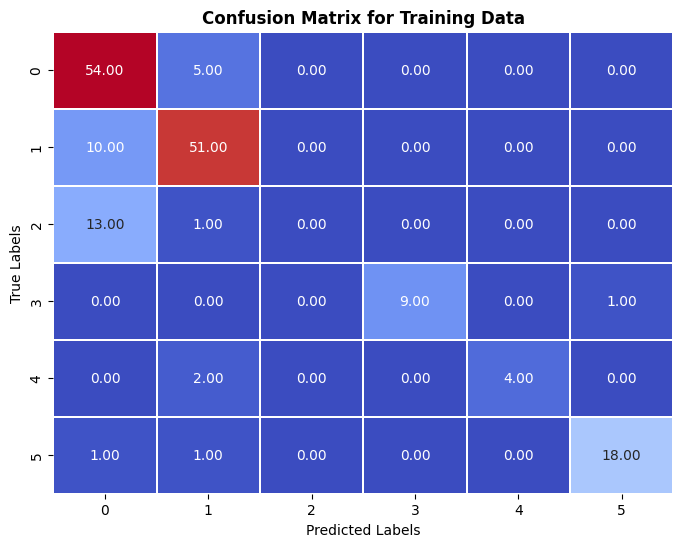

In [ ]:
cm_sm_train = confusion_matrix(y_train , yhat_sm_train)
plt.figure(figsize = (8,6))
sns.heatmap(cm_sm_train, annot = True, cmap = 'coolwarm',
            cbar = False, fmt = '.2f', linewidths = 0.025)
plt.title('Confusion Matrix for Training Data', fontweight = 'bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification Report

In [ ]:
ac_sm_train = accuracy_score(y_train, yhat_sm_train)
print('Accuracy Score')
print(ac_sm_train)

Accuracy Score
0.8


In [ ]:
print("Classification Report")
print(classification_report(y_train, yhat_sm_train))
print("*"*2)
print('\nROC_AUC Score\n')
print(roc_auc_score(y_train, yhat_sm_prob_train, multi_class = 'ovr'))

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.92      0.79        59
           2       0.85      0.84      0.84        61
           3       0.00      0.00      0.00        14
           5       1.00      0.90      0.95        10
           6       1.00      0.67      0.80         6
           7       0.95      0.90      0.92        20

    accuracy                           0.80       170
   macro avg       0.75      0.70      0.72       170
weighted avg       0.75      0.80      0.77       170

**

ROC_AUC Score

0.9756641824779236


In [ ]:
ras_sm_train = roc_auc_score(y_train, yhat_sm_prob_train, multi_class = 'ovr')
ras_sm_train

np.float64(0.9756641824779236)

### Model on Testing Data

In [ ]:
yhat_sm_test = stacking_model.predict(X_test)
yhat_sm_prob_test = stacking_model.predict_proba(X_test)

#### Confusion Matrix

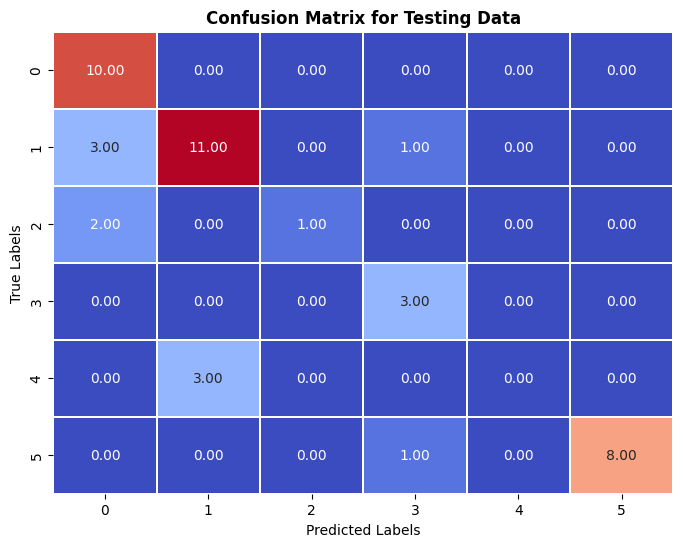

In [ ]:
cm_sm_test = confusion_matrix(y_test, yhat_sm_test)
plt.figure(figsize = (8,6))
sns.heatmap(cm_sm_test, annot = True, cmap = 'coolwarm',
            cbar = False, fmt = '.2f', linewidths = 0.025)
plt.title('Confusion Matrix for Testing Data', fontweight = 'bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification Report

In [ ]:
ac_sm_test = accuracy_score(y_test, yhat_sm_test)
print('Accuracy Score')
print(ac_sm_test)

Accuracy Score
0.7674418604651163


In [ ]:
print("Classification Report")
print(classification_report(y_test, yhat_sm_test))
print("*"*2)
print('\nROC_AUC Score\n')
print(roc_auc_score(y_test, yhat_sm_prob_test, multi_class = 'ovr'))

Classification Report
              precision    recall  f1-score   support

           1       0.67      1.00      0.80        10
           2       0.79      0.73      0.76        15
           3       1.00      0.33      0.50         3
           5       0.60      1.00      0.75         3
           6       0.00      0.00      0.00         3
           7       1.00      0.89      0.94         9

    accuracy                           0.77        43
   macro avg       0.68      0.66      0.62        43
weighted avg       0.75      0.77      0.73        43

**

ROC_AUC Score

0.9668328947740713


In [ ]:
ras_sm_test = roc_auc_score(y_test, yhat_sm_prob_test, multi_class = 'ovr')
ras_sm_test

np.float64(0.9668328947740713)

# All Models Scores

In [ ]:
from math import nan
model_scores = pd.DataFrame({
    'Model' : ['RandomForest Classifier', 'Bagging Classifier', 'Adaboost Classifier',
               'Voting Classifier', 'Stacking Classifier'],
    'Accuracy Train Scores' : [ac_rf_train, ac_bg_train, ac_bo_train, ac_vc_train, ac_sm_train],
    'Accuracy Test Scores' : [ac_rf_test, ac_bg_test, ac_bo_test, ac_vc_test, ac_sm_test],
    'ROC_AUC Train Scores' : [ras_rf_train, ras_bg_train, ras_bo_train, nan, ras_sm_train],
    'ROC_AUC Test Scores' : [ras_rf_test, ras_bg_test, ras_bo_test, nan , ras_sm_test]

})

In [ ]:
model_scores

,Model,Accuracy Train Scores,Accuracy Test Scores,ROC_AUC Train Scores,ROC_AUC Test Scores
0,RandomForest Classifier,1.000000,0.790698,1.000000,0.964964
1,Bagging Classifier,0.964706,0.767442,0.999230,0.974185
2,Adaboost Classifier,1.000000,0.837209,1.000000,0.978565
3,Voting Classifier,0.758824,0.720930,NaN,NaN
4,Stacking Classifier,0.800000,0.767442,0.975664,0.966833


Conclusions
Best Overall Model: Bagging and AdaBoost classifiers offered the best balance between training and testing performance.

Overfitting Alert: Random Forest showed signs of overfitting due to perfect training scores but lower test accuracy.

Model Selection: For deployment, Bagging or AdaBoost would be preferable.